In [76]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision

class RC:
    def __init__(self,
                 N_input,
                 N_hidden,
                 N_output,
                 alpha,
                 ) -> None:
        self.N_in = N_input
        self.N_hid = N_hidden
        self.N_out = N_output
        self.alpha = alpha
        
    def reset(self,):
        self.W_in = np.random.uniform(low=np.zeros((self.N_hid, self.N_in)), 
                                      high=np.ones((self.N_hid, self.N_in)))
        self.A = np.random.uniform(low=np.zeros((self.N_hid, self.N_hid)), 
                                   high=np.ones((self.N_hid, self.N_hid)))
        self.W_out = np.random.uniform(low=np.zeros((self.N_out, self.N_hid)), 
                                   high=np.ones((self.N_out, self.N_hid)))
        self.r_history = np.zeros((self.N_hid, 1))
        
        
    def activation(self, x):
        return np.tanh(x)
    
    def forward(self, x):
        Ar = np.matmul(self.A, self.r_history)
        U = np.matmul(self.W_in, x)
        r = (1-self.alpha) * self.r_history + self.alpha * self.activation(Ar + U)
        y = np.matmul(self.W_out, r)
        self.r_history = r
        
        return y

In [2]:
train_data = torchvision.datasets.MNIST(root='./reservoir/data/',
                                        train=True,
                                        transform=None,
                                        download=False,
                                        ).data.float()/255
print('train shape:', train_data.shape)
print(train_data[0][7:14,7:14])


d:\Anaconda3\envs\ai\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


train shape: torch.Size([60000, 28, 28])
tensor([[0.1922, 0.9333, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922],
        [0.0706, 0.8588, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922],
        [0.0000, 0.3137, 0.6118, 0.4196, 0.9922, 0.9922, 0.8039],
        [0.0000, 0.0000, 0.0549, 0.0039, 0.6039, 0.9922, 0.3529],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5451, 0.9922, 0.7451],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.7451, 0.9922],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.9451]])


In [4]:
train_data[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

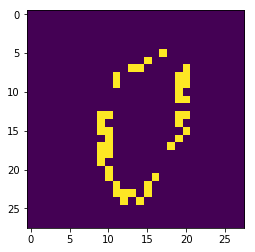

In [141]:
from torch.distributions import Poisson, Uniform
import torch

p = Uniform(low=torch.zeros(28,28), high=torch.ones(28,28))
img = p.sample()
idx = img<=(train_data[1000]-0.5)
img = torch.zeros_like(img)
img[idx] = 1
plt.imshow(img)

In [145]:
img.flatten().numpy()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.